In [11]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [12]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [13]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [49]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")
conn = engine.connect()

In [50]:
# reflect an existing database into a new model
# reflect the tables
Base = automap_base()
Base.prepare(engine,reflect=True)

In [51]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [52]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [53]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [54]:
#get column info for measurement table
inspector = inspect(engine)
columns = inspector.get_columns('measurement')
for c in columns:
    print(c['name'], c['type'])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [55]:
# Find the most recent date in the data set.
session.query(func.max(Measurement.date)).all()

[('2017-08-23',)]

In [108]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
# Calculate the date one year from the last date in data set.
prior_year_date = dt.date(2017,8,23) - dt.timedelta(days=365)

# Perform a query to retrieve the data and precipitation scores
annual_prec = session.query(Measurement.date, Measurement.prcp).\
    filter(Measurement.date >= prior_year_date).all()

# Save the query results as a Pandas DataFrame and set the index to the date column
# Sort the dataframe by date
annual_prec_df = pd.DataFrame(annual_prec, columns=['Date', 'Precipitation'])


annual_prec_df.sort_values('Date',inplace=True)
annual_prec_df = annual_prec_df.set_index('Date')
annual_prec_df.head()

,Precipitation
Date,
2016-08-23,0.00
2016-08-23,NaN
2016-08-23,1.79
2016-08-23,0.05
2016-08-23,0.15


<function matplotlib.pyplot.show(close=None, block=None)>

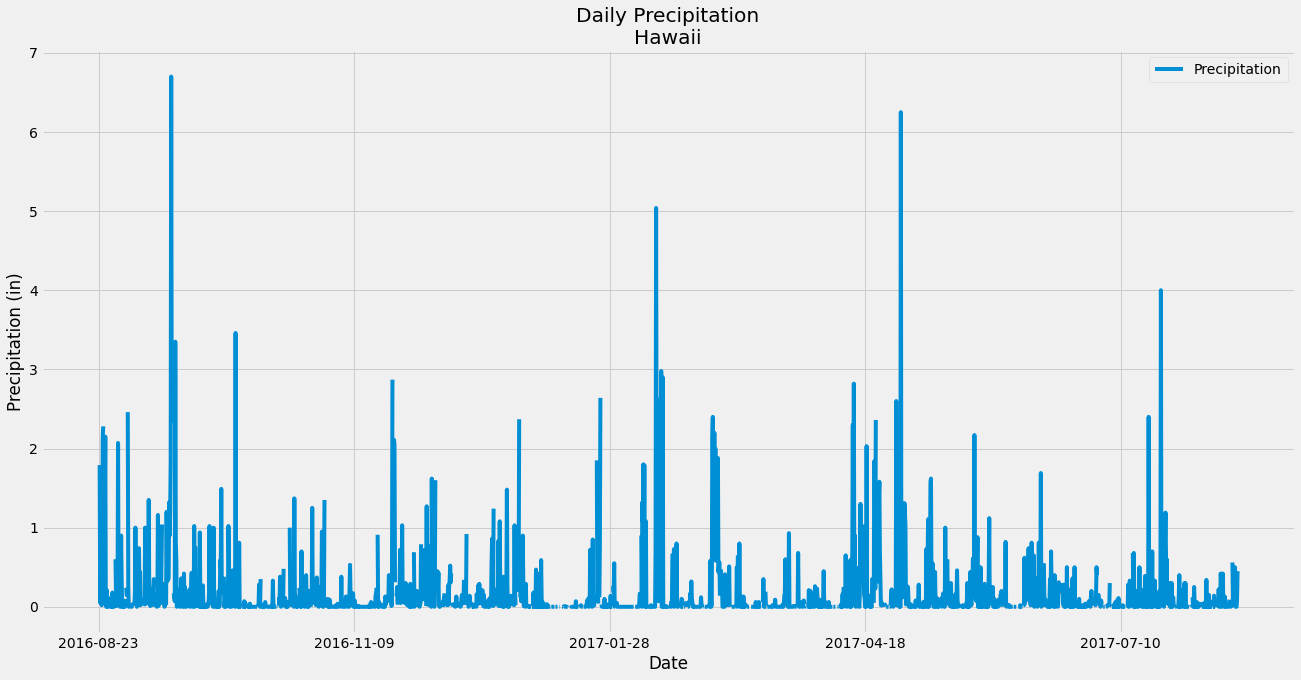

In [112]:
# Use Pandas Plotting with Matplotlib to plot the data
annual_prec_df.plot(title = 'Daily Precipitation\nHawaii', xlabel = 'Date', ylabel='Precipitation (in)',figsize=(20,10))
plt.legend(loc='upper right')
plt.show


In [113]:
# Use Pandas to calcualte the summary statistics for the precipitation data
annual_prec_df.describe()

,Precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [ ]:
# Design a query to calculate the total number stations in the dataset


In [ ]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.


In [ ]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.


In [ ]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram


# Close session

In [ ]:
# Close Session
session.close()